In [2]:
# Установка необходимых пакетов
!pip install qiskit[all]~=2.0.0
!pip install matplotlib
!pip install qiskit-aer

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 10.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 102.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 76.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.0/109.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.5/29.5 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 33.4 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=bfabc40885a0539feaa09b72459b80b7b5e0dae2efd871bd20c0761da875057d
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
  Created wheel for 

Шаг 1: Подготовка состояния


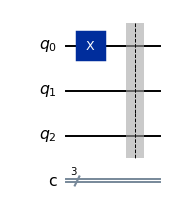


Шаг 2: Создание запутанной пары


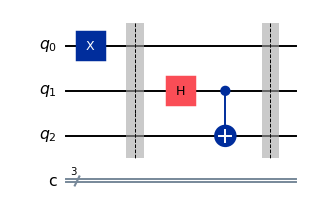


Шаг 3: Операции телепортации


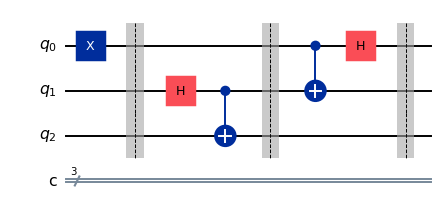


Шаг 4: Измерение


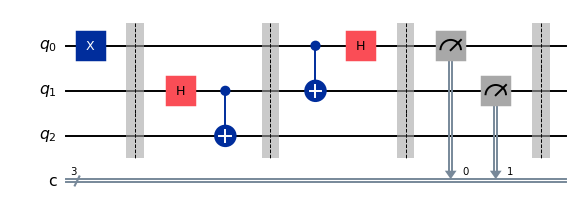


Шаг 5: Коррекция состояния


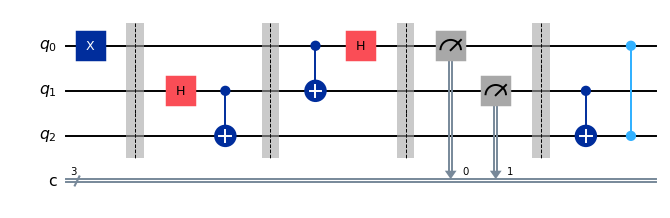


Финальная схема:


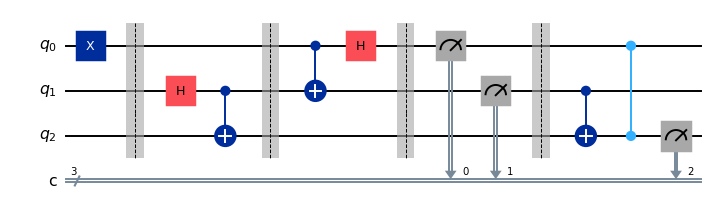


Запуск симуляции...

Результаты симуляции:
{'111': 243, '100': 259, '101': 261, '110': 261}


In [4]:
# Импорт библиотек
from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.visualization import plot_histogram
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

# Настройка отображения графиков в Jupyter
%matplotlib inline

# Инициализация квантовой схемы
qr = 3  # Квантовый регистр
cr = 3  # Классический регистр
circuit = QuantumCircuit(qr, cr)

# Шаг 1: Подготовка состояния для телепортации
circuit.x(0)  # Переворот кубита 0 из |0> в |1>
circuit.barrier()
print("Шаг 1: Подготовка состояния")
display(circuit.draw(output='mpl', scale=0.7))  # Используем display для Jupyter

# Шаг 2: Создание запутанной пары
circuit.h(1)
circuit.cx(1, 2)
circuit.barrier()
print("\nШаг 2: Создание запутанной пары")
display(circuit.draw(output='mpl', scale=0.7))

# Шаг 3: Операции телепортации
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier()
print("\nШаг 3: Операции телепортации")
display(circuit.draw(output='mpl', scale=0.7))

# Шаг 4: Измерение
circuit.measure([0, 1], [0, 1])
circuit.barrier()
print("\nШаг 4: Измерение")
display(circuit.draw(output='mpl', scale=0.7))

# Шаг 5: Коррекция состояния
circuit.cx(1, 2)
circuit.cz(0, 2)
print("\nШаг 5: Коррекция состояния")
display(circuit.draw(output='mpl', scale=0.7))

# Финальное измерение
circuit.measure(2, 2)
print("\nФинальная схема:")
display(circuit.draw(output='mpl', scale=0.7))

# Локальная симуляция
print("\nЗапуск симуляции...")
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(circuit, shots=1024)
result = job.result()
counts = result.get_counts()

# Визуализация результатов
print("\nРезультаты симуляции:")
print(counts)
plot_histogram(counts,
               title="Результат квантовой телепортации",
               color="#1E90FF",
               figsize=(8, 5))
plt.show()